# GI NLP

In [156]:
import os
import glob
import ntpath
import pandas as pd
import numpy as np
import re
from nltk import TweetTokenizer
import seaborn as sns
import matplotlib.pyplot as plt
import xml.etree.ElementTree
from xml.dom import minidom

In [24]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail or ntpath.basename(head)

In [54]:
dict_data = {}

In [55]:
path = 'D:\\Machine Learning\\Datasets\PAN 18 Author Profiling\\pan18-author-profiling-training-2018-02-27\\en\\text'
for filename in glob.glob(os.path.join(path, '*.xml')):
    name = path_leaf(filename)[:-4]
    dict_data[name] = []
    root = xml.etree.ElementTree.parse(filename).getroot()
    for child in root[0]:
        dict_data[name].append(child.text)

In [37]:
labels = pd.read_csv('D:\\Machine Learning\\Datasets\PAN 18 Author Profiling\\pan18-author-profiling-training-2018-02-27\\en\\en_labels.csv')

In [38]:
labels.head()

,identifier,gender
0,e7d4417837acf11f36e08b136df04539,female
1,7e199c5885131a2579429c07f3215cbc,female
2,3bde88332e6d2c51f8dda422fe15ba34,female
3,d181625d0d5c775d0857820c31a5a7c,female
4,a68e08c1372d1a0daf0cc5afbdf67fb8,female


In [71]:
data = pd.DataFrame(columns=['identifier', 'tweet', 'gender'])
count = 0
for identifier, tweets in dict_data.items():
    gender = labels[labels.identifier == identifier].gender.values[0]
    for tweet in tweets:
        #data = data.append(pd.Series([identifier,tweet, gender], index=data.columns), ignore_index=True, inpl)
        data.loc[count] = [identifier,tweet, gender]
        count +=1

In [63]:
len(dict_data.items())

3000

In [72]:
print(count)

300000


In [66]:
data.head()

,identifier,tweet,gender
0,1003de26f870d27f79887272a1eb3612,One to watch … \nAvailable on 10th Feb. https:...,male
1,1003de26f870d27f79887272a1eb3612,@kirkj @deleifd There are 3 complete sets in e...,male
2,1003de26f870d27f79887272a1eb3612,"@deleifd If you have 1, 3, (maybe 5), 10 or 14...",male
3,1003de26f870d27f79887272a1eb3612,@deleifd I've heard that numerous other toywor...,male
4,1003de26f870d27f79887272a1eb3612,Just heard about a new Web Dev meetup in The H...,male


In [73]:
data.shape

(300000, 3)

In [74]:
data.to_csv('Tweets_Each.csv', index=False)

In [102]:
data = pd.read_csv('Tweets_Each.csv')

In [103]:
data.head()

,identifier,tweet,gender
0,1003de26f870d27f79887272a1eb3612,One to watch … \r\nAvailable on 10th Feb. http...,male
1,1003de26f870d27f79887272a1eb3612,@kirkj @deleifd There are 3 complete sets in e...,male
2,1003de26f870d27f79887272a1eb3612,"@deleifd If you have 1, 3, (maybe 5), 10 or 14...",male
3,1003de26f870d27f79887272a1eb3612,@deleifd I've heard that numerous other toywor...,male
4,1003de26f870d27f79887272a1eb3612,Just heard about a new Web Dev meetup in The H...,male


In [104]:
data.shape

(300000, 3)

In [105]:
data.head()

,identifier,tweet,gender
0,1003de26f870d27f79887272a1eb3612,One to watch … \r\nAvailable on 10th Feb. http...,male
1,1003de26f870d27f79887272a1eb3612,@kirkj @deleifd There are 3 complete sets in e...,male
2,1003de26f870d27f79887272a1eb3612,"@deleifd If you have 1, 3, (maybe 5), 10 or 14...",male
3,1003de26f870d27f79887272a1eb3612,@deleifd I've heard that numerous other toywor...,male
4,1003de26f870d27f79887272a1eb3612,Just heard about a new Web Dev meetup in The H...,male


In [60]:
grp = data.groupby(['identifier', 'gender'])

In [72]:
ar = grp['tweet']
data_concat = ar.apply(lambda x: x.str.cat(sep=' <eot> '))

In [164]:
data_df = data_concat.to_frame()

In [165]:
data_df = data_df.reset_index()

In [166]:
data_df = data_df.set_index('identifier')

In [121]:
#data_df['tweet'] = data_df.tweet.apply(lambda x: x + ' <eot>')

In [167]:
data_df.to_csv('Tweets_concated_row.csv', index=False)

In [168]:
data_df['tweet'] = data_df.tweet.apply(lambda x: re.sub(r"\B@\w+", "<user>", x))

In [169]:
data_df['tweet'] = data_df.tweet.apply(lambda x: re.sub('http\S+\s*', '<url>', x))

In [170]:
#hashtag_re = re.compile("(?:^|\s)[＃#]{1}(\w+)", re.UNICODE)
#data_df['hashtags'] = data_df.tweet.apply(lambda x: hashtag_re.findall(x))

In [171]:
data_df.to_csv('Tweets_concated.csv', index=False)

# Baseline models

## Baseline model using n-grams

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [143]:
tweetTokenizer = TweetTokenizer()

In [148]:
tfidf_vectorizer = TfidfVectorizer(
            sublinear_tf=True,
            strip_accents='unicode',
            analyzer='word',
            tokenizer=tweetTokenizer.tokenize,
            ngram_range=(1, 3),
            max_features=10000)

In [149]:
tfidf_vectorizer.fit(data_df.tweet)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x00000135AEB90E10>>,
        use_idf=True, vocabulary=None)

In [150]:
X_tfidg_vect = tfidf_vectorizer.transform(data_df.tweet)

In [153]:
le = LabelEncoder()
y = le.fit_transform(data_df.gender)

In [154]:
cv_results = cross_val_score(LogisticRegression(), X_tfidg_vect, y)

C:\Users\Simeon\Anaconda3\envs\First\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Simeon\Anaconda3\envs\First\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [158]:
print('CV Mean: %f std: %f' % (np.mean(cv_results), np.std(cv_results)))

CV Mean: 0.805333 std: 0.021792


## Baseline model using Deep Learning

In [ ]:
tweetTokenizer = TweetTokenizer()
tweet_tokes = data_df.tweet.apply(lambda x : tweetTokenizer.tokenize(x))
tweets_len = tweet_tokes.apply(lambda x: len(x))

In [174]:
tweets_len.mean()

1696.171

In [175]:
tweets_len.std()

287.60587176114905

C:\Users\Simeon\Anaconda3\envs\First\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


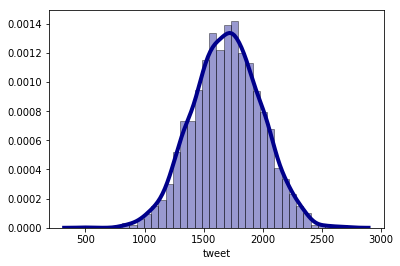

In [176]:
sns.distplot(tweets_len, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

In [178]:
unique_tokens = set()
data_df.tweet.apply(lambda x: unique_tokens.update(tweetTokenizer.tokenize(x.lower())))
len(unique_tokens)

144721

In [181]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras import layers
import os
from keras.utils import to_categorical


In [182]:
max_len = 2050
max_words = 100000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data_df.tweet)
train_seq = tokenizer.texts_to_sequences(data_df.tweet)

In [184]:
train_seq_padded = pad_sequences(train_seq, maxlen=max_len)

In [187]:
glove_dir = r'D:\Machine Learning\Embeddings\glove.twitter.27B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.twitter.27B.200d.txt'), encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 1193514 word vectors.


In [197]:
embedding_dim = 200
word_index = tokenizer.word_index
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i >= max_words:
        break
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [209]:
model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_len))
model.add(layers.GRU(32))
model.add(layers.Dense(1, activation='sigmoid'))

In [210]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [213]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [214]:
history = model.fit(train_seq_padded, y,
                   epochs=30,
                   batch_size=128,
                   validation_split=0.2)

Train on 2400 samples, validate on 600 samples
Epoch 1/30
2400/2400 [==============================] - 60s 25ms/step - loss: 0.7007 - acc: 0.5025 - val_loss: 0.6982 - val_acc: 0.5200
Epoch 2/30
2400/2400 [==============================] - 61s 26ms/step - loss: 0.6817 - acc: 0.5625 - val_loss: 0.6903 - val_acc: 0.5333
Epoch 3/30
2400/2400 [==============================] - 60s 25ms/step - loss: 0.6732 - acc: 0.5821 - val_loss: 0.7051 - val_acc: 0.4917
Epoch 4/30
2400/2400 [==============================] - 60s 25ms/step - loss: 0.6603 - acc: 0.6104 - val_loss: 0.6858 - val_acc: 0.5667
Epoch 5/30
2400/2400 [==============================] - 59s 25ms/step - loss: 0.6501 - acc: 0.6246 - val_loss: 0.6840 - val_acc: 0.5650
Epoch 6/30
2400/2400 [==============================] - 61s 25ms/step - loss: 0.6369 - acc: 0.6471 - val_loss: 0.6840 - val_acc: 0.5583
Epoch 7/30
2400/2400 [==============================] - 68s 28ms/step - loss: 0.6211 - acc: 0.6688 - val_loss: 0.6682 - val_acc: 0.5883
E

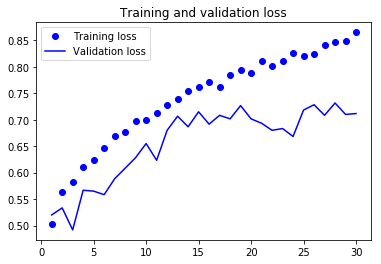

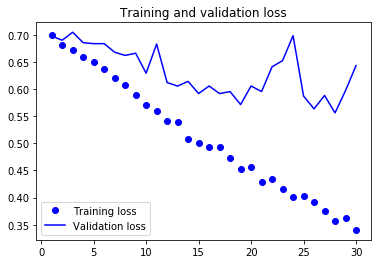

In [218]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()